# 从函数到高级魔法方法

## 1.函数

### 1.1 函数参数

Python 的函数具有非常灵活多样的参数形态，既可以实现简单的调用，又可以传入非常复杂的参数。从简到繁的参数形态如下：
- 位置参数 (positional argument)
- 默认参数 (default argument)
- 可变参数 (variable argument)
- 关键字参数 (keyword argument)
- 命名关键字参数 (name keyword argument)
- 参数组合


**1. 位置参数**

> def functionname(arg1):<br>
> &nbsp; &nbsp; &nbsp; &nbsp;"函数_文档字符串"<br>
> &nbsp; &nbsp; &nbsp; &nbsp;function_suite<br>
> &nbsp; &nbsp; &nbsp; &nbsp;return [expression]<br>

- `arg1` - 位置参数 ，这些参数在调用函数 (call function) 时位置要固定。

**2. 默认参数**


> def functionname(arg1, arg2=v):<br>
> &nbsp; &nbsp; &nbsp; &nbsp;"函数_文档字符串"<br>
> &nbsp; &nbsp; &nbsp; &nbsp;function_suite<br>
> &nbsp; &nbsp; &nbsp; &nbsp;return [expression]<br>

- `arg2 = v` - 默认参数 = 默认值，调用函数时，默认参数的值如果没有传入，则被认为是默认值。
- 默认参数一定要放在位置参数 <b>后面</b>，不然程序会报错。

**- Python 允许函数调用时参数的顺序与声明时不一致，因为 Python 解释器能够用参数名匹配参数值。**


In [1]:

def printinfo(name, age):
    print('Name:{0},Age:{1}'.format(name, age))

printinfo(age=8, name='小马')  # Name:小马,Age:8

Name:小马,Age:8


**3. 可变参数**

顾名思义，可变参数就是传入的参数个数是可变的，可以是 0, 1, 2 到任意个，是不定长的参数。


> def functionname(arg1, arg2=v, *args):<br>
> &nbsp; &nbsp; &nbsp; &nbsp;"函数_文档字符串"<br>
> &nbsp; &nbsp; &nbsp; &nbsp;function_suite<br>
> &nbsp; &nbsp; &nbsp; &nbsp;return [expression]<br>

- `*args` - 可变参数，可以是从零个到任意个，自动组装成元组。
- 加了星号（*）的变量名会存放所有未命名的变量参数。

**4. 关键字参数**


> def functionname(arg1, arg2=v, *args, ***kw):<br>
> &nbsp; &nbsp; &nbsp; &nbsp;"函数_文档字符串"<br>
> &nbsp; &nbsp; &nbsp; &nbsp;function_suite<br>
> &nbsp; &nbsp; &nbsp; &nbsp;return [expression]<br>

- `**kw` - 关键字参数，可以是从零个到任意个，自动组装成字典。

In [3]:
def printinfo(arg1, *args, **kwargs):
    print(arg1)
    print(args)
    print(kwargs)


printinfo(70, 60, 50)
printinfo(70, 60, 50, a=1, b=2)

70
(60, 50)
{}
70
(60, 50)
{'a': 1, 'b': 2}


可变参数」和「关键字参数」的同异总结如下：
- 可变参数允许传入零个到任意个参数，它们在函数调用时自动组装为一个元组 (tuple)。
- 关键字参数允许传入零个到任意个参数，它们在函数内部自动组装为一个字典 (dict)。

**5. 命名关键字参数**
```
def functionname(arg1, arg2=v, args, *, nkw, **kw):
       "函数_文档字符串"
       function_suite
       return [expression]
```

- `*, nkw` - 命名关键字参数，用户想要输入的关键字参数，定义方式是在nkw 前面加个分隔符 `*`。
- 如果要限制关键字参数的名字，就可以用「命名关键字参数」
- 使用命名关键字参数时，要特别注意不能缺少参数名。

In [4]:
def printinfo(arg1, *, nkw, **kwargs):
    print(arg1)
    print(nkw)
    print(kwargs)


printinfo(70, nkw=10, a=1, b=2)
# 70
# 10
# {'a': 1, 'b': 2}

printinfo(70, 10, a=1, b=2)
# TypeError: printinfo() takes 1 positional argument but 2 were given

70
10
{'a': 1, 'b': 2}


TypeError: printinfo() takes 1 positional argument but 2 were given

### 1.2 变量作用域
Python 中，程序的变量并不是在哪个位置都可以访问的，访问权限决定于这个变量是在哪里赋值的。

定义在函数内部的变量拥有局部作用域，该变量称为局部变量。

定义在函数外部的变量拥有全局作用域，该变量称为全局变量

局部变量只能在其被声明的函数内部访问，而全局变量可以在整个程序范围内访问。


当内部作用域想修改外部作用域的变量时，就要用到`global`和`nonlocal关键字了

In [5]:
num = 1


def fun1():
    global num  # 需要使用 global 关键字声明
    print(num)  # 1
    num = 123
    print(num)  # 123


fun1()
print(num)  # 123

1
123
123


**闭包**

- 是函数式编程的一个重要的语法结构，是一种特殊的内嵌函数。
- 如果在一个内部函数里对外层非全局作用域的变量进行引用，那么内部函数就被认为是闭包。
- 通过闭包可以访问外层非全局作用域的变量，这个作用域称为 <b>闭包作用域</b>。


In [6]:
def funX(x):
    def funY(y):
        return x * y

    return funY


i = funX(8)
print(type(i))  # <class 'function'>
print(i(5))  # 40

<class 'function'>
40


In [7]:
def make_counter(init):
    counter = [init]

    def inc(): counter[0] += 1

    def dec(): counter[0] -= 1

    def get(): return counter[0]

    def reset(): counter[0] = init

    return inc, dec, get, reset


inc, dec, get, reset = make_counter(0)
inc()
inc()
inc()
print(get())  # 3
dec()
print(get())  # 2
reset()
print(get())  # 0

3
2
0


如果要修改闭包作用域中的变量则需要 `nonlocal` 关键字

In [11]:
def outer():
    num = 10

    def inner():
        nonlocal num
        num = 100
        print(num)

    inner()
    print(num)

    
outer()

# 100
# 100

100
100


## 2. Lambda 表达式

### 2.1 匿名函数的定义

```
lambda argument_list: expression
```

In [12]:
sumary = lambda arg1, arg2: arg1 + arg2
print(sumary(10, 20))  # 30

func = lambda *args: sum(args)
print(func(1, 2, 3, 4, 5))  # 15

30
15


### 2.2 匿名函数的应用

函数式编程 是指代码中每一块都是不可变的，都由纯函数的形式组成。这里的纯函数，是指函数本身相互独立、互不影响，对于相同的输入，总会有相同的输出，没有任何副作用。

In [ ]:
##### 非函数式编程
def f(x):
    for i in range(0, len(x)):
        x[i] += 10
    return x

##### 函数式编程
def f(x):
    y = []
    for item in x:
        y.append(item + 10)
    return y

匿名函数 常常应用于函数式编程的高阶函数 (high-order function)中，主要有两种形式：
- 参数是函数 (filter, map)
- 返回值是函数 (closure)


如，在 `filter`和`map`函数中的应用：

- `filter(function, iterable)` 过滤序列，过滤掉不符合条件的元素，返回一个迭代器对象，如果要转换为列表，可以使用 `list()` 来转换。

In [13]:
odd = lambda x: x % 2 == 1
templist = filter(odd, [1, 2, 3, 4, 5, 6, 7, 8, 9])
print(list(templist))  # [1, 3, 5, 7, 9]

[1, 3, 5, 7, 9]


In [14]:
m2 = map(lambda x, y: x + y, [1, 3, 5, 7, 9], [2, 4, 6, 8, 10])
print(list(m2))  
# [3, 7, 11, 15, 19]

[3, 7, 11, 15, 19]


除了 Python 这些内置函数，我们也可以自己定义高阶函数。

In [ ]:

def apply_to_list(fun, some_list):
    return fun(some_list)

lst = [1, 2, 3, 4, 5]
print(apply_to_list(sum, lst))
# 15

print(apply_to_list(len, lst))
# 5

print(apply_to_list(lambda x: sum(x) / len(x), lst))
# 3.0

## 3.类与对象
- 继承：子类自动共享父类之间数据和方法的机制

In [15]:
class MyList(list):
    pass


lst = MyList([1, 5, 2, 7, 8])
lst.append(9)
lst.sort()
print(lst)

# [1, 2, 5, 7, 8, 9]

[1, 2, 5, 7, 8, 9]


- 多态：不同对象对同一方法响应不同的行动

In [16]:
class Animal:
    def run(self):
        raise AttributeError('子类必须实现这个方法')

class People(Animal):
    def run(self):
        print('人正在走')

class Pig(Animal):
    def run(self):
        print('pig is walking')

def func(animal):
    animal.run()


func(Pig())
# pig is walking

pig is walking


类的方法与普通的函数只有一个特别的区别 —— 它们必须有一个额外的第一个参数名称（对应于该实例，即该对象本身），按照惯例它的名称是 `self`。在调用方法时，我们无需明确提供与参数 `self` 相对应的参数。

In [17]:
class Ball:
    def setName(self, name):
        self.name = name

    def kick(self):
        print("我叫%s,该死的，谁踢我..." % self.name)

a = Ball()
a.setName("球A")
a.kick()

我叫球A,该死的，谁踢我...


### 3.1 Python 的魔法方法

如果你的对象实现了这些方法中的某一个，那么这个方法就会在特殊的情况下被 Python 所调用，而这一切都是自动发生的...

类有一个名为`__init__(self[, param1, param2...])`的魔法方法，该方法在类实例化时会自动调用。


In [18]:
class Ball:
    def __init__(self, name):
        self.name = name

    def kick(self):
        print("我叫%s,该死的，谁踢我..." % self.name)


a = Ball("球A")
a.kick()
# 我叫球A,该死的，谁踢我...

我叫球A,该死的，谁踢我...


### 3.2 公有和私有

在 Python 中定义私有变量只需要在变量名或函数名前加上“__”两个下划线，那么这个函数或变量就会为私有的了。

In [ ]:
class JustCounter:
    __secretCount = 0  # 私有变量
    publicCount = 0  # 公开变量

    def count(self):
        self.__secretCount += 1
        self.publicCount += 1
        print(self.__secretCount)


counter = JustCounter()
counter.count()  # 1
counter.count()  # 2
print(counter.publicCount)  # 2

# Python的私有为伪私有
print(counter._JustCounter__secretCount)  # 2 
print(counter.__secretCount)  

类的私有方法

In [20]:
class Site:
    def __init__(self, name, url):
        self.name = name  # public
        self.__url = url  # private
        
    def __foo(self):  # 私有方法
        print('这是私有方法')

    def foo(self):  # 公共方法
        print('这是公共方法')
        self.__foo()

In [24]:
x = Site('老马的程序人生', 'https://blog.csdn.net/LSGO_MYP')

x.foo()

x.__foo()
# AttributeError: 'Site' object has no attribute '__foo'

这是公共方法
这是私有方法


AttributeError: 'Site' object has no attribute '__foo'

### 3.3 继承
```
class DerivedClassName(BaseClassName):
       statement-1
              .
              .
              .
       statement-N
```
`BaseClassName`（基类名）必须与派生类定义在一个作用域内。除了类，还可以用表达式，基类定义在另一个模块中时这一点非常有用：
```
class DerivedClassName(modname.BaseClassName):
       statement-1
              .
              .
              .
       statement-N
```

In [ ]:
# 类定义
class people:
    # 定义基本属性
    name = ''
    age = 0
    # 定义私有属性,私有属性在类外部无法直接进行访问
    __weight = 0

    # 定义构造方法
    def __init__(self, n, a, w):
        self.name = n
        self.age = a
        self.__weight = w

    def speak(self):
        print("%s 说: 我 %d 岁。" % (self.name, self.age))


# 单继承示例
class student(people):
    grade = ''

    def __init__(self, n, a, w, g):
        # 调用父类的构函
        people.__init__(self, n, a, w)
        self.grade = g

    # 覆写父类的方法
    def speak(self):
        print("%s 说: 我 %d 岁了，我在读 %d 年级" % (self.name, self.age, self.grade))


s = student('小马的程序人生', 10, 60, 3)
s.speak()
# 小马的程序人生 说: 我 10 岁了，我在读 3 年级

### 3.4 组合

In [25]:
class Turtle:
    def __init__(self, x):
        self.num = x


class Fish:
    def __init__(self, x):
        self.num = x


class Pool:
    def __init__(self, x, y):
        self.turtle = Turtle(x)
        self.fish = Fish(y)

    def print_num(self):
        print("水池里面有乌龟%s只，小鱼%s条" % (self.turtle.num, self.fish.num))


p = Pool(2, 3)
p.print_num()
# 水池里面有乌龟2只，小鱼3条

水池里面有乌龟2只，小鱼3条


### 3.5 类、类对象和实例对象
![类对象和实例对象](https://img-blog.csdnimg.cn/20191007090316462.png)

类对象：创建一个类，其实也是一个对象也在内存开辟了一块空间，称为类对象，类对象只有一个。

实例对象：就是通过实例化类创建的对象，称为实例对象，实例对象可以有多个。

### 3.6 什么是绑定？

Python 严格要求方法需要有实例才能被调用，这种限制其实就是 Python 所谓的绑定概念。

Python 对象的数据属性通常存储在名为`.__ dict__`的字典中，我们可以直接访问`__dict__`，或利用 Python 的内置函数`vars()`获取`.__ dict__`。

In [32]:
class CC:
    def setXY(self, x, y):
        self.x = x
        self.y = y

    def printXY(self):
        print(self.x, self.y)


dd = CC()
print(dd.__dict__)
# {}
print(vars(dd))
# {}
print(CC.__dict__)
# {'__module__': '__main__', 'setXY': <function CC.setXY at 0x000000C3473DA048>, 'printXY': <function CC.printXY at 0x000000C3473C4F28>, '__dict__': <attribute '__dict__' of 'CC' objects>, '__weakref__': <attribute '__weakref__' of 'CC' objects>, '__doc__': None}
print(vars(CC))
# {'__module__': '__main__', 'setXY': <function CC.setXY at 0x000000632CA9B048>, 'printXY': <function CC.printXY at 0x000000632CA83048>, '__dict__': <attribute '__dict__' of 'CC' objects>, '__weakref__': <attribute '__weakref__' of 'CC' objects>, '__doc__': None}


dd.setXY(4, 5)
print(dd.__dict__)   # {'x': 4, 'y': 5}
print(vars(dd))   # {'x': 4, 'y': 5}

{}
{}
{'__module__': '__main__', 'setXY': <function CC.setXY at 0x7fa770991ee0>, 'printXY': <function CC.printXY at 0x7fa770991e50>, '__dict__': <attribute '__dict__' of 'CC' objects>, '__weakref__': <attribute '__weakref__' of 'CC' objects>, '__doc__': None}
{'__module__': '__main__', 'setXY': <function CC.setXY at 0x7fa770991ee0>, 'printXY': <function CC.printXY at 0x7fa770991e50>, '__dict__': <attribute '__dict__' of 'CC' objects>, '__weakref__': <attribute '__weakref__' of 'CC' objects>, '__doc__': None}
{'x': 4, 'y': 5}
{'x': 4, 'y': 5}


### 3.7 一些相关的内置函数（BIF）
- `issubclass(class, classinfo)` 方法用于判断参数 class 是否是类型参数 classinfo 的子类。
- 一个类被认为是其自身的子类。
- `classinfo`可以是类对象的元组，只要class是其中任何一个候选类的子类，则返回`True`。

In [33]:
class A:
    pass

class B(A):
    pass

print(issubclass(B, A))  # True
print(issubclass(B, B))  # True
print(issubclass(A, B))  # False
print(issubclass(B, object))  # True

True
True
False
True



- `isinstance(object, classinfo)` 方法用于判断一个对象是否是一个已知的类型，类似`type()`。
- `type()`不会认为子类是一种父类类型，不考虑继承关系。
- `isinstance()`会认为子类是一种父类类型，考虑继承关系。
- 如果第一个参数不是对象，则永远返回`False`。
- 如果第二个参数不是类或者由类对象组成的元组，会抛出一个`TypeError`异常。

In [34]:
a = 2
print(isinstance(a, int))  # True
print(isinstance(a, str))  # False
print(isinstance(a, (str, int, list)))  # True


class A:
    pass

class B(A):
    pass

print(isinstance(A(), A))  # True
print(type(A()) == A)  # True
print(isinstance(B(), A))  # True
print(type(B()) == A)  # False

True
False
True
True
True
True
False


- `hasattr(object, name)`用于判断对象是否包含对应的属性。

In [36]:
class Coordinate:
    x = 10
    y = -5
    z = 0


point1 = Coordinate()
print(hasattr(point1, 'x'))  # True
print(hasattr(point1, 'no'))  # False

True
False


- `getattr(object, name[, default])`用于返回一个对象属性值。


In [39]:
class A(object):
    bar = 1

a = A()
print(getattr(a, 'bar'))  # 1
print(getattr(a, 'bar2', 3))  # 3
print(getattr(a, 'bar2'))   # AttributeError: 'A' object has no attribute 'bar2'

1
3


AttributeError: 'A' object has no attribute 'bar2'

In [42]:
class A(object):
    bar = 1
    
    def set(self, a, b):
        x = a
        a = b
        b = x
        print(a, b)


a = A()
c = getattr(a, 'set')
c(a='1', b='2')  # 2 1

2 1


- `setattr(object, name, value)`对应函数 `getattr()`，用于设置属性值，该属性不一定是存在的。

In [43]:
class A(object):
    bar = 1


a = A()
print(getattr(a, 'bar'))  # 1
setattr(a, 'bar', 5)
print(a.bar)  # 5
setattr(a, "age", 28)
print(a.age)  # 28

1
5
28


- `delattr(object, name)`用于删除属性。

In [45]:
class Coordinate:
    x = 10
    y = -5
    z = 0

point1 = Coordinate()
delattr(Coordinate, 'z')

print('z = ', point1.z)   # AttributeError: 'Coordinate' object has no attribute 'z'

AttributeError: 'Coordinate' object has no attribute 'z'

In [46]:
class C(object):
    def __init__(self):
        self.__x = None

    def getx(self):
        return self.__x

    def setx(self, value):
        self.__x = value

    def delx(self):
        del self.__x

    x = property(getx, setx, delx, "I'm the 'x' property.")


cc = C()
cc.x = 2
print(cc.x)  # 2

del cc.x
print(cc.x)   # AttributeError: 'C' object has no attribute '_C__x'

2


AttributeError: 'C' object has no attribute '_C__x'

## 4.魔法方法

魔法方法总是被双下划线包围，例如`__init__`。

魔法方法的“魔力”体现在它们总能够在适当的时候被自动调用。

魔法方法的第一个参数应为`cls`（类方法） 或者`self`（实例方法）。
- `cls`：代表一个类的名称
- `self`：代表一个实例对象的名称


### 4.1 基本的魔法方法

- `__init__(self[, ...])` 构造器，当一个实例被创建的时候调用的初始化方法


- `__new__(cls[, ...])` 在一个对象实例化的时候所调用的第一个方法，在调用`__init__`初始化前，先调用`__new__`。
    - `__new__`至少要有一个参数`cls`，代表要实例化的类，此参数在实例化时由 Python 解释器自动提供，后面的参数直接传递给`__init__`。
    - `__new__`对当前类进行了实例化，并将实例返回，传给`__init__`的`self`。但是，执行了`__new__`，并不一定会进入`__init__`，只有`__new__`返回了，当前类`cls`的实例，当前类的`__init__`才会进入。


In [51]:
class A(object):
    def __init__(self, value):
        print("into A __init__")
        self.value = value

    def __new__(cls, *args, **kwargs):
        print("into A __new__")
        print(cls)
        return object.__new__(cls)


class B(A):
    def __init__(self, value):
        print("into B __init__")
        print(value)
        self.value = value

    def __new__(cls, *args, **kwargs):
        print("into B __new__")
        print(cls)
        return super().__new__(cls, *args, **kwargs)
    

b = B(10)

into B __new__
<class '__main__.B'>
into A __new__
<class '__main__.B'>
into B __init__
10



- 若`__new__`没有正确返回当前类`cls`的实例，那`__init__`是不会被调用的，即使是父类的实例也不行，将没有`__init__`被调用。

【例子】利用`__new__`实现单例模式。

In [55]:
class Earth:
    pass


a = Earth()
print(id(a))  # 140357125495776
b = Earth()
print(id(b))  # 140357125399648

class Earth:
    __instance = None  # 定义一个类属性做判断

    def __new__(cls):
        if cls.__instance is None:
            print(cls.__instance)
            cls.__instance = object.__new__(cls)
            print(cls.__instance)
            return cls.__instance
        else:
            return cls.__instance


a = Earth()
print(id(a))  # 140357125493616
b = Earth()
print(id(b))  # 140357125493616

140357125495536
140357125494768
None
140357123297968
140357123297968


- `__new__`方法主要是当你继承一些不可变的 class 时（比如`int, str, tuple`）， 提供给你一个自定义这些类的实例化过程的途径。

In [53]:
class CapStr(str):
    def __new__(cls, string):
        string = string.upper()
        return str.__new__(cls, string)


a = CapStr("i love lsgogroup")
print(a)  # I LOVE LSGOGROUP

I LOVE LSGOGROUP



- `__del__(self)` 析构器，当一个对象将要被系统回收之时调用的方法。

> Python 采用自动引用计数（ARC）方式来回收对象所占用的空间，当程序中有一个变量引用该 Python 对象时，Python 会自动保证该对象引用计数为 1；当程序中有两个变量引用该 Python 对象时，Python 会自动保证该对象引用计数为 2，依此类推，如果一个对象的引用计数变成了 0，则说明程序中不再有变量引用该对象，表明程序不再需要该对象，因此 Python 就会回收该对象。
>
> 大部分时候，Python 的 ARC 都能准确、高效地回收系统中的每个对象。但如果系统中出现循环引用的情况，比如对象 a 持有一个实例变量引用对象 b，而对象 b 又持有一个实例变量引用对象 a，此时两个对象的引用计数都是 1，而实际上程序已经不再有变量引用它们，系统应该回收它们，此时 Python 的垃圾回收器就可能没那么快，要等专门的循环垃圾回收器（Cyclic Garbage Collector）来检测并回收这种引用循环。

In [56]:
class C(object):
    def __init__(self):
        print('into C __init__')

    def __del__(self):
        print('into C __del__')


c1 = C()
# into C __init__
c2 = c1
c3 = c2
del c3
del c2
del c1
# into C __del__

into C __init__
into C __del__


- `__str__(self)`:
    - 当你打印一个对象的时候，触发`__str__`
    - 当你使用`%s`格式化的时候，触发`__str__`
    - `str`强转数据类型的时候，触发`__str__`

- `__repr__(self)`：
    - `repr`是`str`的备胎
    - 有`__str__`的时候执行`__str__`,没有实现`__str__`的时候，执行`__repr__`
    - `repr(obj)`内置函数对应的结果是`__repr__`的返回值
    - 当你使用`%r`格式化的时候 触发`__repr__`


In [57]:
class Cat:
    """定义一个猫类"""

    def __init__(self, new_name, new_age):
        """在创建完对象之后 会自动调用, 它完成对象的初始化的功能"""
        self.name = new_name
        self.age = new_age

    def __str__(self):
        """返回一个对象的描述信息"""
        return "名字是:%s , 年龄是:%d" % (self.name, self.age)
        
    def __repr__(self):
        """返回一个对象的描述信息"""
        return "Cat:(%s,%d)" % (self.name, self.age)

    def eat(self):
        print("%s在吃鱼...." % self.name)

    def drink(self):
        print("%s在喝可乐..." % self.name)

    def introduce(self):
        print("名字是:%s, 年龄是:%d" % (self.name, self.age))


# 创建了一个对象
tom = Cat("汤姆", 30)
print(tom)  # 名字是:汤姆 , 年龄是:30
print(str(tom)) # 名字是:汤姆 , 年龄是:30
print(repr(tom))  # Cat:(汤姆,30)
tom.eat()  # 汤姆在吃鱼....
tom.introduce()  # 名字是:汤姆, 年龄是:30

名字是:汤姆 , 年龄是:30
名字是:汤姆 , 年龄是:30
Cat:(汤姆,30)
汤姆在吃鱼....
名字是:汤姆, 年龄是:30


`__str__(self)` 的返回结果可读性强。也就是说，`__str__` 的意义是得到便于人们阅读的信息，就像下面的 '2019-10-11' 一样。

`__repr__(self)` 的返回结果应更准确。怎么说，`__repr__` 存在的目的在于调试，便于开发者使用。

In [58]:
import datetime

today = datetime.date.today()
print(str(today))  # 2019-10-11
print(repr(today))  # datetime.date(2019, 10, 11)
print('%s' %today)  # 2019-10-11
print('%r' %today)  # datetime.date(2019, 10, 11)

2021-02-24
datetime.date(2021, 2, 24)
2021-02-24
datetime.date(2021, 2, 24)


### 4.2 算术运算符

类型工厂函数，指的是“不通过类而是通过函数来创建对象”。

In [59]:
# 这个例子中list工厂函数把一个元祖对象加工成了一个列表对象。
print(list((1, 2, 3)))  # [1, 2, 3]

[1, 2, 3]


- `__add__(self, other)`定义加法的行为：`+`
- `__sub__(self, other)`定义减法的行为：`-`

In [61]:
class MyClass:

    def __init__(self, height, weight):
        self.height = height
        self.weight = weight

    # 两个对象的长相加，宽不变.返回一个新的类
    def __add__(self, others):
        return MyClass(self.height + others.height, self.weight + others.weight)

    # 两个对象的宽相减，长不变.返回一个新的类
    def __sub__(self, others):
        return MyClass(self.height - others.height, self.weight - others.weight)

    # 说一下自己的参数
    def intro(self):
        print("高为", self.height, " 重为", self.weight)


def main():
    a = MyClass(height=10, weight=5)
    a.intro()

    b = MyClass(height=20, weight=10)
    b.intro()

    c = b - a
    c.intro()

    d = a + b
    d.intro()


if __name__ == '__main__':
    main()

高为 10  重为 5
高为 20  重为 10
高为 10  重为 5
高为 30  重为 15


- `__mul__(self, other)`定义乘法的行为：`*`
- `__truediv__(self, other)`定义真除法的行为：`/`
- `__floordiv__(self, other)`定义整数除法的行为：`//`
- `__mod__(self, other)` 定义取模算法的行为：`%`
- `__divmod__(self, other)`定义当被 `divmod()` 调用时的行为
- `divmod(a, b)`把除数和余数运算结果结合起来，返回一个包含商和余数的元组`(a // b, a % b)`。

In [62]:
print(divmod(7, 2))  # (3, 1)
print(divmod(8, 2))  # (4, 0)

(3, 1)
(4, 0)


- `__pow__(self, other[, module])`定义当被 `power()` 调用或 `**` 运算时的行为
- `__lshift__(self, other)`定义按位左移位的行为：`<<`
- `__rshift__(self, other)`定义按位右移位的行为：`>>`
- `__and__(self, other)`定义按位与操作的行为：`&`
- `__xor__(self, other)`定义按位异或操作的行为：`^`
- `__or__(self, other)`定义按位或操作的行为：`|`


### 4.3 反算术运算符

反运算魔方方法，与算术运算符保持一一对应，不同之处就是反运算的魔法方法多了一个“r”。当文件左操作不支持相应的操作时被调用。

- `__radd__(self, other)`定义加法的行为：`+`
- `__rsub__(self, other)`定义减法的行为：`-`
- `__rmul__(self, other)`定义乘法的行为：`*`
- `__rtruediv__(self, other)`定义真除法的行为：`/`
- `__rfloordiv__(self, other)`定义整数除法的行为：`//`
- `__rmod__(self, other)` 定义取模算法的行为：`%`
- `__rdivmod__(self, other)`定义当被 divmod() 调用时的行为
- `__rpow__(self, other[, module])`定义当被 power() 调用或 `**` 运算时的行为
- `__rlshift__(self, other)`定义按位左移位的行为：`<<`
- `__rrshift__(self, other)`定义按位右移位的行为：`>>`
- `__rand__(self, other)`定义按位与操作的行为：`&`
- `__rxor__(self, other)`定义按位异或操作的行为：`^`
- `__ror__(self, other)`定义按位或操作的行为：`|`

`a + b`

这里加数是`a`，被加数是`b`，因此是`a`主动，反运算就是如果`a`对象的`__add__()`方法没有实现或者不支持相应的操作，那么 Python 就会调用`b`的`__radd__()`方法。


In [63]:
class Nint(int):
    def __radd__(self, other):
        return int.__sub__(other, self) # 注意 self 在后面


a = Nint(5)
b = Nint(3)
print(a + b)  # 8
print(1 + b)  # -2

8
-2



### 4.4 增量赋值运算符

- `__iadd__(self, other)`定义赋值加法的行为：`+=`
- `__isub__(self, other)`定义赋值减法的行为：`-=`
- `__imul__(self, other)`定义赋值乘法的行为：`*=`
- `__itruediv__(self, other)`定义赋值真除法的行为：`/=`
- `__ifloordiv__(self, other)`定义赋值整数除法的行为：`//=`
- `__imod__(self, other)`定义赋值取模算法的行为：`%=`
- `__ipow__(self, other[, modulo])`定义赋值幂运算的行为：`**=`
- `__ilshift__(self, other)`定义赋值按位左移位的行为：`<<=`
- `__irshift__(self, other)`定义赋值按位右移位的行为：`>>=`
- `__iand__(self, other)`定义赋值按位与操作的行为：`&=`
- `__ixor__(self, other)`定义赋值按位异或操作的行为：`^=`
- `__ior__(self, other)`定义赋值按位或操作的行为：`|=`


### 4.5  一元运算符
- `__neg__(self)`定义正号的行为：`+x`
- `__pos__(self)`定义负号的行为：`-x`
- `__abs__(self)`定义当被`abs()`调用时的行为
- `__invert__(self)`定义按位求反的行为：`~x`

### 4.6  属性访问
- `__getattr__(self, name)`: 定义当用户试图获取一个不存在的属性时的行为。
- `__getattribute__(self, name)`：定义当该类的属性被访问时的行为（先调用该方法，查看是否存在该属性，若不存在，接着去调用`__getattr__`）。
- `__setattr__(self, name, value)`：定义当一个属性被设置时的行为。
- `__delattr__(self, name)`：定义当一个属性被删除时的行为。


In [64]:
class C:
    def __getattribute__(self, item):
        print('__getattribute__')
        return super().__getattribute__(item)

    def __getattr__(self, item):
        print('__getattr__')

    def __setattr__(self, key, value):
        print('__setattr__')
        super().__setattr__(key, value)

    def __delattr__(self, item):
        print('__delattr__')
        super().__delattr__(item)


c = C()
c.x
# __getattribute__
# __getattr__

c.x = 1
# __setattr__

del c.x
# __delattr__

__getattribute__
__getattr__
__setattr__
__delattr__


### 4.7 迭代器

- 迭代是 Python 最强大的功能之一，是访问集合元素的一种方式。
- 迭代器是一个可以记住遍历的位置的对象。
- 迭代器对象从集合的第一个元素开始访问，直到所有的元素被访问完结束。
- 迭代器只能往前不会后退。
- 字符串，列表或元组对象都可用于创建迭代器：

In [65]:
string = 'lsgogroup'
for c in string:
    print(c)

for c in iter(string):
    print(c)

l
s
g
o
g
r
o
u
p
l
s
g
o
g
r
o
u
p


In [66]:
links = {'B': '百度', 'A': '阿里', 'T': '腾讯'}
for each in links:
    print('%s -> %s' % (each, links[each]))

for each in iter(links):
    print('%s -> %s' % (each, links[each]))

B -> 百度
A -> 阿里
T -> 腾讯
B -> 百度
A -> 阿里
T -> 腾讯


- 迭代器有两个基本的方法：`iter()` 和 `next()`。
- `iter(object)` 函数用来生成迭代器。
- `next(iterator[, default])` 返回迭代器的下一个项目。
- `iterator` -- 可迭代对象
- `default` -- 可选，用于设置在没有下一个元素时返回该默认值，如果不设置，又没有下一个元素则会触发 `StopIteration` 异常。


In [72]:
links = {'B': '百度', 'A': '阿里', 'T': '腾讯'}

it = iter(links)
while True:
    try:
        each = next(it)
    except StopIteration as r:
        print('StopIteration', r)
        break
    print(each)

# B
# A
# T

it = iter(links)
print(next(it))  # B
print(next(it))  # A
print(next(it))  # T
print(next(it))  # StopIteration

B
A
T
StopIteration 
B
A
T


StopIteration: 


把一个类作为一个迭代器使用需要在类中实现两个魔法方法 `__iter__()` 与 `__next__()` 。

- `__iter__(self)`定义当迭代容器中的元素的行为，返回一个特殊的迭代器对象， 这个迭代器对象实现了 `__next__()` 方法并通过 `StopIteration` 异常标识迭代的完成。
- `__next__()` 返回下一个迭代器对象。
- `StopIteration` 异常用于标识迭代的完成，防止出现无限循环的情况，在 `__next__()` 方法中我们可以设置在完成指定循环次数后触发 `StopIteration` 异常来结束迭代。

In [73]:
class Fibs:
    def __init__(self, n=10):
        self.a = 0
        self.b = 1
        self.n = n

    def __iter__(self):
        return self

    def __next__(self):
        self.a, self.b = self.b, self.a + self.b
        if self.a > self.n:
            raise StopIteration
        return self.a


fibs = Fibs(100)
for each in fibs:
    print(each, end=' ')

# 1 1 2 3 5 8 13 21 34 55 89

1 1 2 3 5 8 13 21 34 55 89 

### <b>4.8 生成器</b>

- 在 Python 中，使用了 `yield` 的函数被称为生成器（generator）。
- 跟普通函数不同的是，生成器是一个返回迭代器的函数，只能用于迭代操作，更简单点理解生成器就是一个迭代器。
- 在调用生成器运行的过程中，每次遇到 `yield` 时函数会暂停并保存当前所有的运行信息，返回 `yield` 的值, 并在下一次执行 `next()` 方法时从当前位置继续运行。
- 调用一个生成器函数，返回的是一个迭代器对象。


In [75]:
def myGen():
    print('生成器执行！')
    yield 1
    yield 2
    
myG = myGen()
for each in myG:
    print(each)

'''
生成器执行！
1
2
'''

myG = myGen()
print(next(myG))  
# 生成器执行！
# 1

print(next(myG))  # 2
print(next(myG))  # StopIteration

生成器执行！
1
2
生成器执行！
1
2


StopIteration: 

In [78]:
def libs(n):
    a = 0
    b = 1
    while True:
        a, b = b, a + b
        if a > n:
            return
        yield a

print(libs(100))
for each in libs(100):
    print(each, end=' ')

# 1 1 2 3 5 8 13 21 34 55 89

<generator object libs at 0x7fa7707b22e0>
1 1 2 3 5 8 13 21 34 55 89 

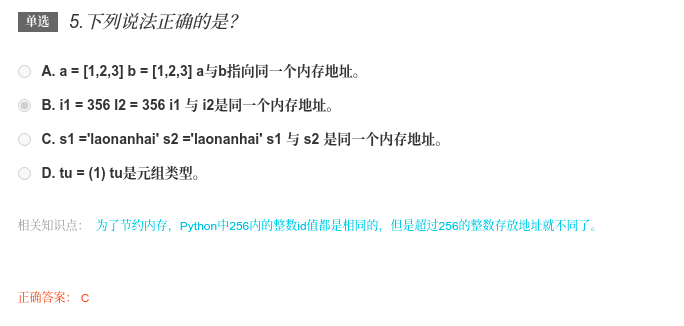
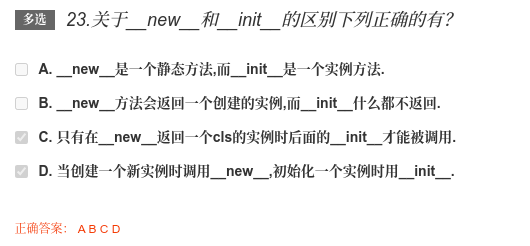
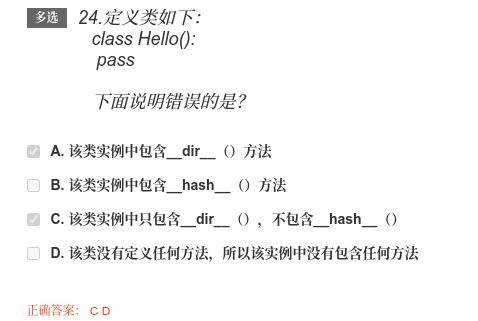